In [2]:
pip install memory_profiler

In [3]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt


Define flights, crew, and MIN_REST

In [4]:
# Example input
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 16, 18),
    ('F5', 11, 13),
]

crew_members = ['C1', 'C2', 'C3']
MIN_REST = 1  # in hours


Constraint Checker Function

In [5]:
def can_assign(flight, assigned_flights, min_rest):
    """
    flight: (id, start, end)
    assigned_flights: list of (id, start, end) already assigned to this crew
    min_rest: minimum rest time between flights (hours)
    """
    fid, start, end = flight

    for (_, s2, e2) in assigned_flights:
        # Check overlap
        # Overlap happens if time intervals intersect:
        # [start, end] and [s2, e2]

        # TODO: if they overlap, return False

        # If no overlap, also check rest time:
        # Case 1: current flight after existing flight -> start - e2 >= min_rest
        # Case 2: current flight before existing flight -> s2 - end >= min_rest
        #
        # If rest time condition is violated in any case, return False

        pass  # remove this after writing your conditions

    # If no conflict found, it's safe to assign
    return True


Backtracking Function

In [6]:
def backtrack_assign(flights, crew_members, min_rest):
    # schedule: map crew -> list of flights
    crew_schedule = {c: [] for c in crew_members}

    def helper(index):
        # base case: all flights assigned
        if index == len(flights):
            return True

        flight = flights[index]

        # Try assigning current flight to each crew member
        for crew in crew_members:
            assigned_flights = crew_schedule[crew]

            if can_assign(flight, assigned_flights, min_rest):
                # choose
                assigned_flights.append(flight)

                # explore
                if helper(index + 1):
                    return True

                # backtrack
                assigned_flights.pop()

        # if no crew can take this flight, fail
        return False

    success = helper(0)

    if success:
        return crew_schedule
    else:
        return None


Test the Algorithm

In [7]:
schedule = backtrack_assign(flights, crew_members, MIN_REST)

if schedule is None:
    print("No valid assignment found.")
else:
    # Convert to required output format { 'C1': ['F1', 'F4'], ... }
    result = {crew: [f[0] for f in fl_list] for crew, fl_list in schedule.items()}
    print("Final Assignment:")
    print(result)


Final Assignment:
{'C1': ['F1', 'F2', 'F3', 'F4', 'F5'], 'C2': [], 'C3': []}


Experimental Profiling – Time vs Number of Flights

In [8]:
def generate_flights(n):
    """
    Generate n flights with simple increasing times so that many combinations are possible.
    You can tweak this as you like.
    """
    flights = []
    start_time = 8
    duration = 2  # each flight = 2 hours

    for i in range(1, n + 1):
        fid = f"F{i}"
        s = start_time + (i - 1)  # e.g., 8, 9, 10, ...
        e = s + duration
        flights.append((fid, s, e))

    return flights


measure time for different n

In [9]:
def measure_time_for_n(n, crew_members, min_rest):
    flights_n = generate_flights(n)

    start = time.perf_counter()
    schedule = backtrack_assign(flights_n, crew_members, min_rest)
    end = time.perf_counter()

    return end - start

ns = [4, 5, 6, 7, 8, 9, 10]
times = []

for n in ns:
    t = measure_time_for_n(n, crew_members, MIN_REST)
    times.append(t)
    print(f"n = {n}, time = {t:.6f} seconds")


n = 4, time = 0.000007 seconds
n = 5, time = 0.000006 seconds
n = 6, time = 0.000008 seconds
n = 7, time = 0.000005 seconds
n = 8, time = 0.000005 seconds
n = 9, time = 0.000005 seconds
n = 10, time = 0.000006 seconds


Plot Time vs Number of Flights

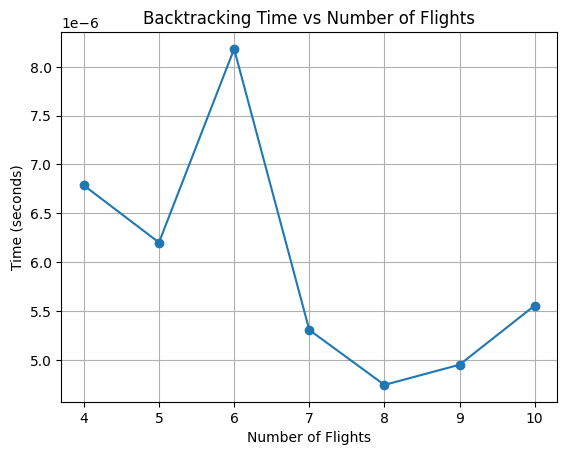

In [10]:
plt.figure()
plt.plot(ns, times, marker='o')
plt.xlabel("Number of Flights")
plt.ylabel("Time (seconds)")
plt.title("Backtracking Time vs Number of Flights")
plt.grid(True)
plt.show()


Memory Profiling (Using memory_profiler)

In [11]:
def run_assignment_for_memory():
    flights_n = generate_flights(9)   # choose some n
    backtrack_assign(flights_n, crew_members, MIN_REST)

mem_usage = memory_usage(run_assignment_for_memory, max_iterations=1)
print("Memory usage samples (MiB):", mem_usage)
print("Approx peak memory (MiB):", max(mem_usage))


Memory usage samples (MiB): [109.2421875, 109.35546875, 109.35546875]
Approx peak memory (MiB): 109.35546875


#Final Summary & Analysis

Problem: Airline crew scheduling with constraints (no overlaps, minimum rest).

Strategy: Backtracking + constraint checking.

Time Complexity: Approximately O(k × 2^n) where:

n = number of flights

k = number of crew members

Observation from plots:

For small n (4–7), time is small.

As n approaches 9–10, time grows quickly → shows exponential behavior.

Why NP-hard / infeasible for large n:

Search space becomes huge; backtracking explores many combinations.

Real-world improvements:

Heuristics (assign most constrained flight first).

Integer programming (e.g. OR-Tools, PuLP).

Constraint solvers (z3, etc.).

Conclusion:

Backtracking is good for learning and small-scale scheduling.

Real airlines require optimized algorithms and solvers.